<a href="https://colab.research.google.com/github/Veciam-CF/DSPS_ZGao/blob/main/HW9/HW9_ZGAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

In [8]:
apparentSizeM31 = 3.167
m31angS = apparentSizeM31 * u.degree
m31distance = 778 * u.kpc
m31distanceError = 33 * u.kpc
m31Size = m31distance * m31angS.to(u.rad)
m31SizeError = m31distanceError * m31angS.to(u.rad)




In [9]:
def getradii(data, N, lum_size):



    R_lum = lum_size[0] * 0.5
    dR_lum = lum_size[1] * 0.5


    R_target = N * R_lum
    dR_target = N * dR_lum


    mask = data["r"].values >= R_target

    idx = np.argmax(mask)

    r_val = data.loc[idx, "r"]
    v_val = data.loc[idx, "v"]
    dv_val = data.loc[idx, "dv"] if "dv" in data.columns else np.nan

    return r_val, dR_target, v_val, dv_val

lum_size = m31Size.value
lum_size_err = m31SizeError.value
m31Rds = [lum_size, lum_size_err]

m31Rds1 = getradii(m31, 1, m31Rds)
print("N=1 → Radius = {:.2f} ± {:.2f} kpc, Velocity = {:.2f} ± {:.2f} km/s".format(*m31Rds1))

# N=2 → radius twice as large
m31Rds2 = getradii(m31, 2, m31Rds)
print("N=2 → Radius = {:.2f} ± {:.2f} kpc, Velocity = {:.2f} ± {:.2f} km/s".format(*m31Rds2))

N=1 → Radius = 23.74 ± 0.91 kpc, Velocity = 236.51 ± 11.73 km/s
N=2 → Radius = 49.22 ± 1.82 kpc, Velocity = 237.07 ± 109.38 km/s


In [18]:
def plotGal(gal, rds):
  gal.plot(x= "r", y = "v", yerr = "dv", kind = "line", ylabel = "velocity [km/s]",
           xlabel = "radius [kpc]", xlim = [0,getradii(gal,3,rds)[0]+10])
  for N in [1,2,3]:
    rds_returned = getradii(gal,N,rds)
    err_tot = gal["err_tot"][gal.r == rds_returned[0]]
    dv = gal["dv"][gal.r == rds_returned[0]]
    err = gal["err"][gal.r == rds_returned[0]]
    plt.errorbar(rds_returned[0], rds_returned[2], yerr = err_tot, label = f"{N}xradius")
    plt.errorbar(rds_returned[0],rds_returned[2],yerr = dv, color = "k")
    # dv and error tot are basically the same at these radii?
    plt.text(x = rds_returned[0], y = rds_returned[2] - (err_tot.values[0]+20),s= f"{rds_returned[2]:.1f}",
             ha = 'center', size = "small", stretch = "semi-condensed")
    plt.text(x = rds_returned[0], y = rds_returned[2] - (err_tot.values[0]+40),s= f"({dv.values[0]:.1f}, {err.values[0]:.1f})",
             ha = "center", size = "small", stretch = "semi-condensed")
    plt.ylim(100,325)
    plt.legend()

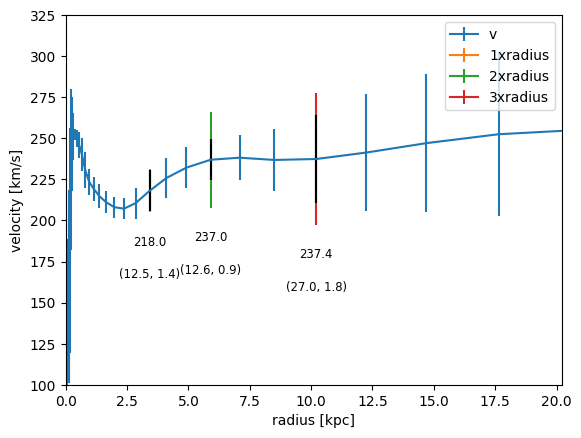

In [19]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/m31.csv",skiprows=1)
m31 = m31.rename(columns={"#R(kpc": "r","V(km/s)": "v","St.dev.": "dv","St.error": "err"})


m31["err_tot"] = np.sqrt(m31["dv"]**2 + m31["err"]**2)
mw = pd.read_csv("https://github.com/fedhere/DSPS_FBianco/raw/refs/heads/main/HW4/mw.csv",skiprows=1)
mw = mw.rename(columns={"R(kpc)": "r","V(km/s)": "v","St.dev.": "dv","St.error": "err"})
mw["err_tot"] = np.sqrt(mw["dv"]**2 + m31["err"]**2)

hl_radius = 5.75 #half-light radius
hl_error = 0.38
mwRds = [hl_radius,hl_error]
plotGal(mw, mwRds)

Once agin, this plot can be used to examine the relation between radius and velocity. What is notable about this plot is the flat nature of the line. Using the preportion derived above (
) we would expect the velocity to fall off as the radius increases, which is not what is seen here. However where the error bars were rather large in the last plot, here they are much smaller, so we can now better constrain the nature of the velocity radius relationship.